In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import random

from collections import Counter

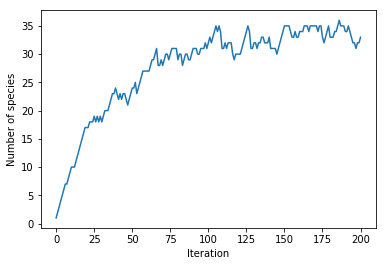

In [97]:
def next_generation(population, mu):
    new_species = max(set(population)) + 1
    next_population = []
    for i in population:
        prob = random.random()
        if prob < mu:
            next_population.append(new_species)
        else:
            next_population.append(random.choice(population))
    
    return next_population
            
def simulate_generations(iterations, N=100, m=1, mu=0.05):
    # Initialize population
    population = []
    for i in range(N):
        population.append(random.randrange(m))
    
    num_species = [m]
    generations = [population]
    for i in range(iterations):
        next_gen = next_generation(population, mu)
        num_species.append(len(set(next_gen)))
        generations.append(next_gen)
        population = next_gen
    
    return generations, np.array(num_species)
    
generations, species = simulate_generations(200, 1000, 1, 7/1000)

plt.plot(species)
plt.ylabel("Number of species")
plt.xlabel("Iteration")
plt.show()

http://rsos.royalsocietypublishing.org/content/4/11/170623

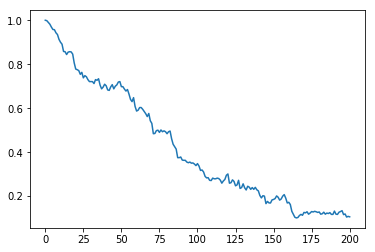

In [98]:
def get_species_proportions(generations, species):
    proportions = []
    N = len(generations[0])
    for generation in generations:
        proportion = Counter(generation)[species] / N
        proportions.append(proportion)
    return np.array(proportions)

generations, _ = simulate_generations(200, 1000, 1, 7/1000)
proportions = get_species_proportions(generations, 0)
plt.plot(proportions)